In [1]:
import numpy as np
import pandas as pd
import warnings    # `do not disturb`
warnings.filterwarnings('ignore')
import pickle
import time
import datetime

# model performance
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("./../g-research-crypto-forecasting/train.csv")

In [3]:
df.isna().sum()

timestamp         0
Asset_ID          0
Count             0
Open              0
High              0
Low               0
Close             0
Volume            0
VWAP              9
Target       750338
dtype: int64

In [4]:
df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


In [5]:
df = df[df["Asset_ID"]==1].set_index("timestamp")
df_mn = df.iloc[-200:]

In [6]:
df.isna().sum()

Asset_ID      0
Count         0
Open          0
High          0
Low           0
Close         0
Volume        0
VWAP          0
Target      304
dtype: int64

In [7]:
import time

totimestamp = lambda s: np.int32(time.mktime(datetime.datetime.strptime(s, "%d/%m/%Y").timetuple()))

df_test = df.loc[totimestamp('01/06/2020'):totimestamp('01/07/2021')].fillna(0)

In [8]:
df_test.size

5118957

In [9]:
df.size

17606538

In [10]:
df_train = df.loc[:totimestamp('01/06/2020')].fillna(0)

In [11]:
df_train.size

11421927

In [12]:
x_train = df_train.drop(["Target"], axis=1).to_numpy()
y_train = df_train["Target"].to_numpy()
# x_train = df_train.drop(["Close"], axis=1).to_numpy()
# y_train = df_train["Close"].to_numpy()

In [13]:
x_test = df_test.drop(["Target"], axis=1).to_numpy()
y_test = df_test["Target"].to_numpy()
# x_test = df_test.drop(["Close"], axis=1).to_numpy()
# y_test = df_test["Close"].to_numpy()

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [15]:
x_train_s = sc.fit_transform(x_train)
x_test_s = sc.fit_transform(x_test)

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

model = lr.fit(x_train_s, y_train)

In [17]:
y_test_predicted = lr.predict(x_test_s)

In [18]:
print(f"{np.corrcoef(y_test_predicted, y_test)[0,1]:.2f}")

-0.00


In [19]:
y_test[:10]

array([0.00108332, 0.00203553, 0.00232547, 0.00217497, 0.00197702,
       0.00170891, 0.0020961 , 0.00208359, 0.00200665, 0.00219748])

In [20]:
y_test_predicted[:10]

array([-9.98626744e-06, -2.37806217e-05, -2.50186843e-05,  8.46471004e-06,
       -1.86075941e-06, -2.28404711e-05, -1.09486344e-05, -1.85505844e-05,
       -1.63742951e-05, -2.85639112e-05])

In [21]:
import matplotlib.pyplot as plt

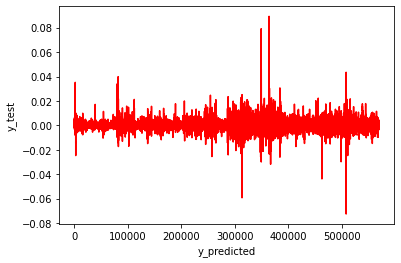

In [22]:
plt.plot(y_test_predicted, color="blue", label="output")
plt.plot(y_test, color="red", label="output")
plt.xlabel("y_predicted")
plt.ylabel("y_test")
plt.show()